# Imports

In [1]:
# imports
import sys
sys.path.append('..')
from functions import *
from networks import *
from plotting import *
from transforms import *
from distribution import *
from statistical import *

In [2]:
import os
# Change to the directory where the train folder is located
os.chdir('../writeup_notebooks_base')
# Verify the change
print("New Working Directory:", os.getcwd())

New Working Directory: /Users/gf244AA/Desktop/Code/fpm-paper-code/writeup_notebooks_base


In [3]:
# import matplotlib
import matplotlib.pyplot as plt

# format sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 15

# matplotlib params
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['xtick.direction'] = 'out' # ticks points outwards
plt.rcParams['lines.linewidth'] = 2.0 # bigger linewidth
plt.rcParams['svg.fonttype'] = 'none' # matplotlib svg text setting

# Initialize Colonies

In [4]:
# params
n_vpn = 20*90
n_kc = 25000
k = 8
p = 0.05
q_l = None # only useful if initialising weights
q_r = None # only useful if initialising weights
alpha = 0.95
mode="top"
init_weights=False
weight_mode='1'
training_mode='exp'
epsilon=0

In [5]:
# useful variables
crossover_index = {'DS_q=1':0, 'DS_q=0.9':1, 'DS_q=0.8':2, 'DS_q=0.7':3, 'DS_q=0.6':4}
overlap_index = {0:0, 8:1, 16:2, 24:3, 32:4, 40:5}

# true mode location dictionnary
mode_location_dict = {
"MODE_1A": 34.7,
"MODE_1B": 16.3,
"MODE_1C": 30.1,
"MODE_2A": 50.5,
"MODE_2B": 70.3,
"MODE_2C": 74.3,
"MODE_3A1": 25.0,
"MODE_3A2": 33.3,
"MODE_3A3": 24.7,
"MODE_3B1": 35.3,
"MODE_3B2": 75.5,
"MODE_3B3": 34.8,
"MODE_3C1": 55.4,
"MODE_3C2": 64.9,
"MODE_3C3": 43.8,
}

# tensor with performances
performance_tensor = np.zeros(shape=(15, 5, 6))
performance_vector = np.zeros(shape=(15,))

In [6]:
# dict of colonies
crossover_names = ['DS_q=1', 'DS_q=0.9', 'DS_q=0.8', 'DS_q=0.7', 'DS_q=0.6']
overlap_names = [0, 8, 16, 24, 32, 40]
colony_size = 50
colony_dict = {(name1,name2):[] for name1 in crossover_names for name2 in overlap_names}

# create colonies
for col1 in crossover_names:
    print(col1)
    for col2 in overlap_names:
        for i in range(colony_size):
            # initialize
            model = LRMBNetwork(
                            n_vpn, 
                            n_kc, 
                            k, 
                            p, 
                            q_l, 
                            q_r, 
                            alpha, 
                            mode, 
                            init_weights, 
                            weight_mode, 
                            training_mode,
                            epsilon)
            # load weights
            model.LeftMB.load_weights('../params_fwd/PARAMS/{}/ant_{}_L.pth'.format(col1, i))
            model.RightMB.load_weights('../params_fwd/PARAMS/{}/ant_{}_R.pth'.format(col1, i))
            # append to colony
            colony_dict[(col1, col2)].append(model)

DS_q=1
DS_q=0.9
DS_q=0.8
DS_q=0.7
DS_q=0.6


# Experiments
-------------

# Train Path 2A

In [36]:
train_path = [np.load('../writeup_paths/train/path_2a.npy')[0]]
train_image = train_path[0]
FPM = compute_fpm(train_image)
train_path

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])]

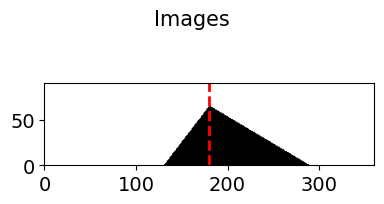

In [8]:
plot_images(train_path[::5])

In [9]:
# train all colonies on the train image
for name, colony in colony_dict.items():
    print (name)
    # transform to get down model features
    train_path_down = [overlap_downsample_transform(arr, overlap=name[1]) for arr in train_path]
    # train
    for model in colony:
        model.LeftMB.initialize_output_weights()
        model.RightMB.initialize_output_weights()
        model.train_network(train_path_down)

('DS_q=1', 0)


/Users/gf244AA/Desktop/Code/fpm-paper-code/writeup_notebooks_additional/../networks.py:278: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:277.)
  image_sequence = torch.Tensor(image_sequence).unsqueeze(1)


('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


# Test Training Image

In [10]:
# load test image
test_rotations = get_shifted_rotations(train_image)
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180

<Axes: title={'center': 'Test Image'}, xlabel='X-axis', ylabel='Y-axis'>

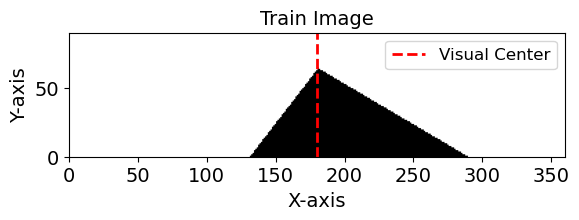

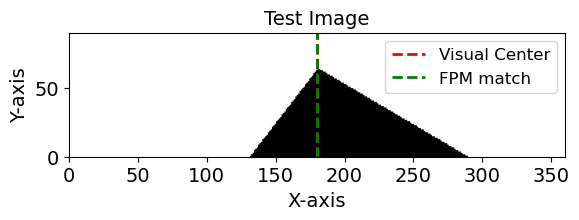

In [11]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image(test_image, fpm=x_fpm, title='Test Image')

In [12]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [13]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # get test rotations
    test_rotations_transformed = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_transformed]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


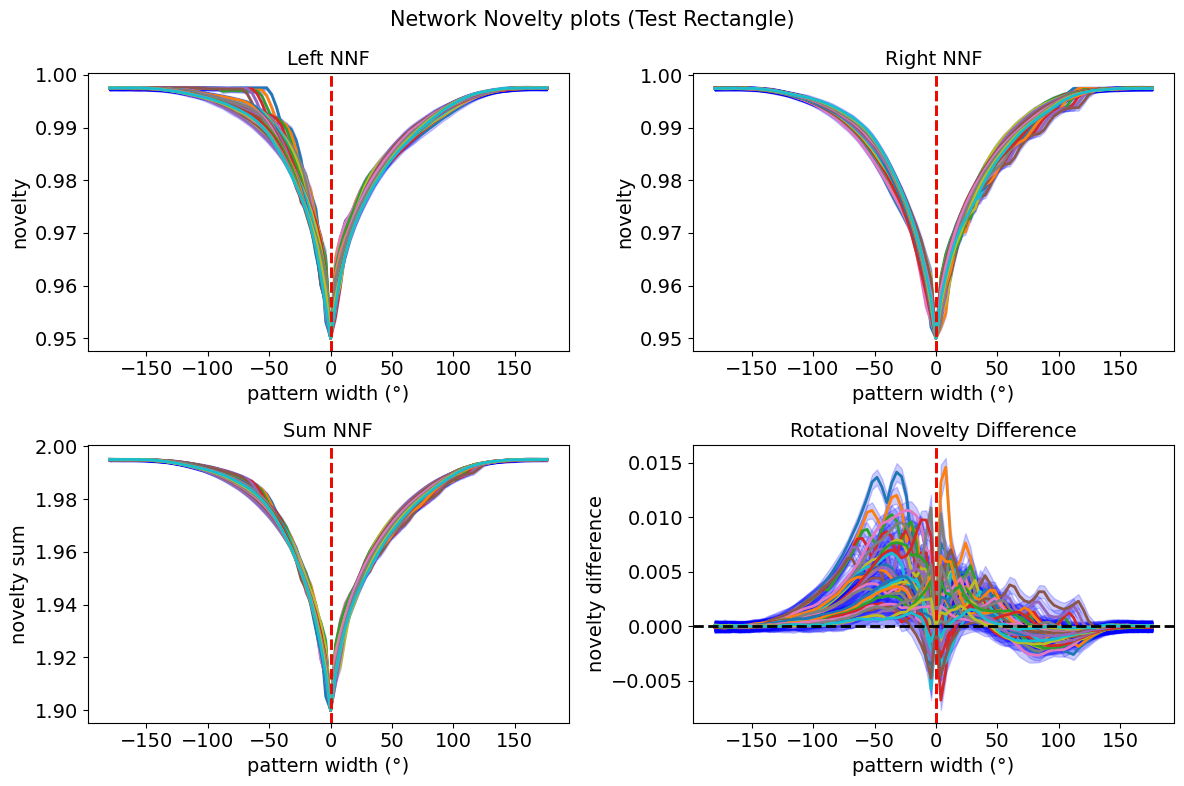

In [14]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=theoretical_angle, color='green', linestyle='--', label='FPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        # no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

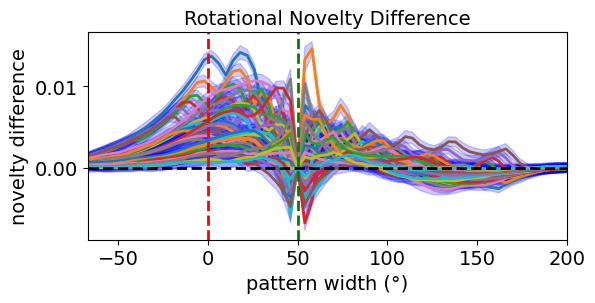

In [15]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 50
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=theoretical_angle+ROLL, color='green', linestyle='--', label='FPM match')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 3
TEST_NAME = "MODE_2A"
dist_pooled = []

# parameters
for name in colony_dict:
    print (name) # loop over colony
    dist_name = []
    for i in range(colony_size):
        # parameters
        novelty_diff = diff_dict[name][i]
        novelty_sum = sum_dict[name][i]
        
        # get weighed distribution
        dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
        dist_name += list(dist_sum)
        dist_pooled += list(dist_sum)

    # performance
    predicted_modes = kde_predictions(dist_name)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_tensor[TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
    print (perf)

# pool performance
predicted_modes = kde_predictions(dist_pooled)
true_mode = mode_location_dict[TEST_NAME]
perf = get_performance(predicted_modes, true_mode)
performance_vector[TEST_NUM] = perf
print (perf)

('DS_q=1', 0)
1.5
('DS_q=1', 8)
3.5
('DS_q=1', 16)
0.5
('DS_q=1', 24)
0.5
('DS_q=1', 32)
0.5
('DS_q=1', 40)
3.5
('DS_q=0.9', 0)
0.5
('DS_q=0.9', 8)
0.5
('DS_q=0.9', 16)
0.5
('DS_q=0.9', 24)
0.5
('DS_q=0.9', 32)
0.5
('DS_q=0.9', 40)
0.5
('DS_q=0.8', 0)
1.5
('DS_q=0.8', 8)
3.5
('DS_q=0.8', 16)
0.5
('DS_q=0.8', 24)
2.5
('DS_q=0.8', 32)
2.5
('DS_q=0.8', 40)
1.5
('DS_q=0.7', 0)
0.5
('DS_q=0.7', 8)
2.5
('DS_q=0.7', 16)
2.5
('DS_q=0.7', 24)
1.5
('DS_q=0.7', 32)
0.5
('DS_q=0.7', 40)
2.5
('DS_q=0.6', 0)
1.5
('DS_q=0.6', 8)
0.5
('DS_q=0.6', 16)
0.5
('DS_q=0.6', 24)
0.5
('DS_q=0.6', 32)
1.5
('DS_q=0.6', 40)
0.5
0.5


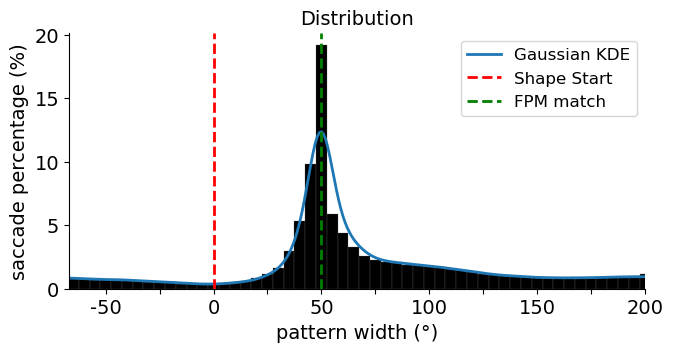

In [18]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.2)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=theoretical_angle+roll, color='green', linestyle='--', label='FPM match')
plt.legend()

# Save the plot as an SVG file
plt.savefig("../writeup_exports_additional/pool/pool_2A.svg", format="svg", bbox_inches='tight')

# show
plt.show()

# Test Image 2B

In [19]:
# load test image
test_rotations = np.load('../writeup_paths/test/image_2b_rotations.npy')
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180
theoretical_angle

24

In [20]:
x_plf = np.argmax(np.sum(test_image,axis=0))
x_plf
plf_angle = x_plf - 180

<Axes: title={'center': 'Test Image'}, xlabel='X-axis', ylabel='Y-axis'>

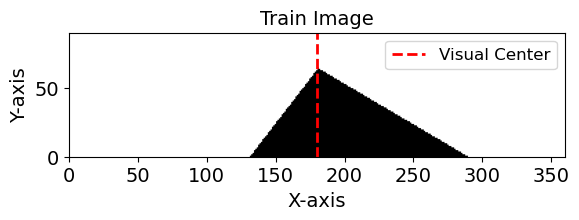

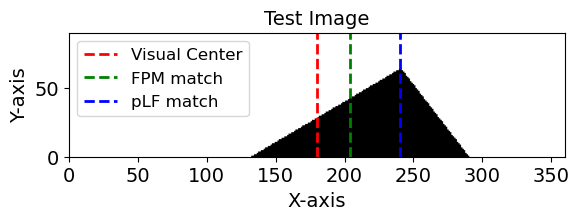

In [21]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image(test_image, fpm=x_fpm, plf=x_plf, title='Test Image')

In [22]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [23]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # get test rotations
    test_rotations_transformed = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_transformed]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


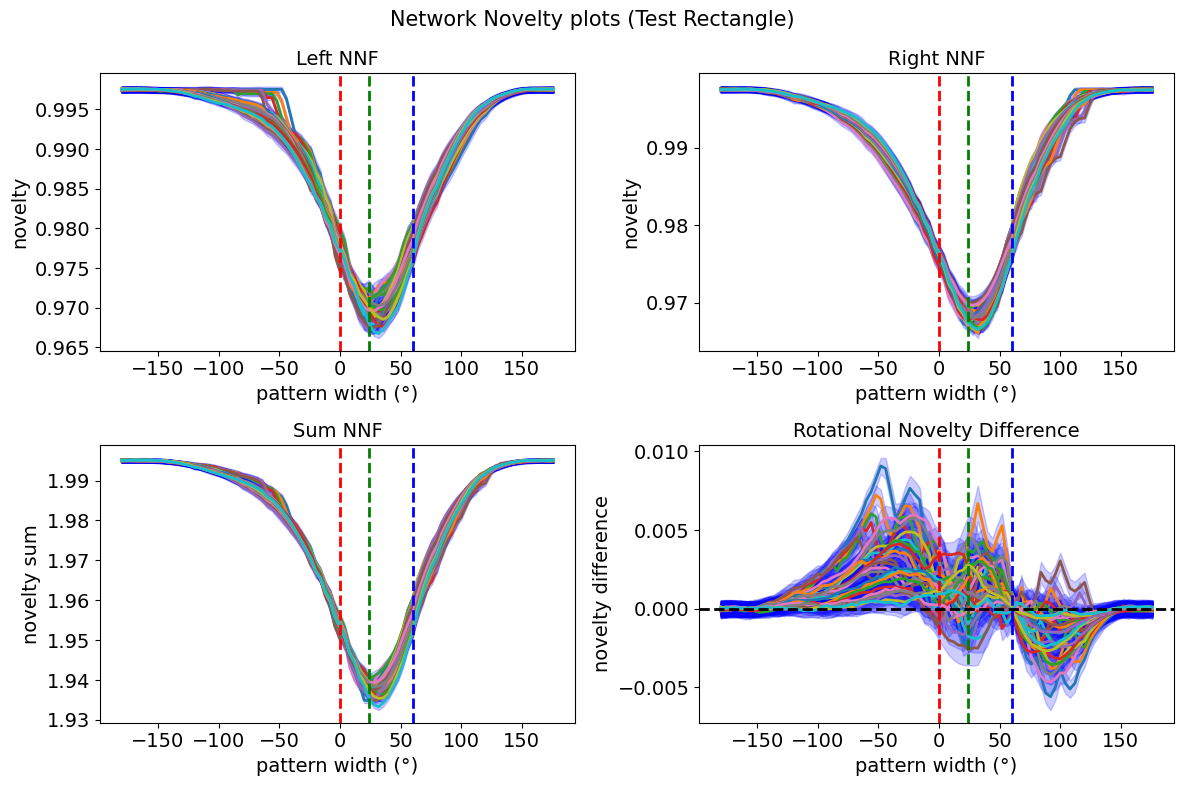

In [24]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=theoretical_angle, color='green', linestyle='--', label='FPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    ax.axvline(x=plf_angle, color='blue', linestyle='--', label='pLF')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        # no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

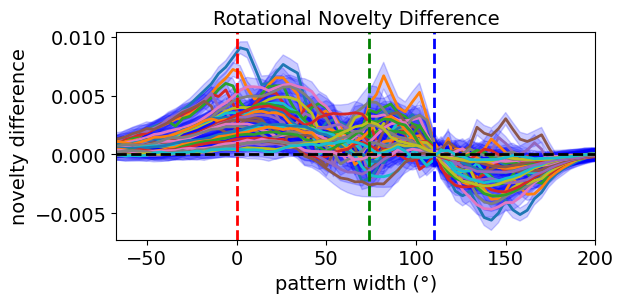

In [25]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 50
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=theoretical_angle+ROLL, color='green', linestyle='--', label='FPM match')
plt.axvline(x=plf_angle+ROLL, color='blue', linestyle='--', label='pLF')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 4
TEST_NAME = "MODE_2B"
dist_pooled = []

# parameters
for name in colony_dict:
    print (name) # loop over colony
    dist_name = []
    for i in range(colony_size):
        # parameters
        novelty_diff = diff_dict[name][i]
        novelty_sum = sum_dict[name][i]
        
        # get weighed distribution
        dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
        dist_name += list(dist_sum)
        dist_pooled += list(dist_sum)

    # performance
    predicted_modes = kde_predictions(dist_name)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_tensor[TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
    print (perf)

# pool performance
predicted_modes = kde_predictions(dist_pooled)
true_mode = mode_location_dict[TEST_NAME]
perf = get_performance(predicted_modes, true_mode)
performance_vector[TEST_NUM] = perf
print (perf)

('DS_q=1', 0)
1.7000000000000028
('DS_q=1', 8)
4.299999999999997
('DS_q=1', 16)
6.299999999999997
('DS_q=1', 24)
10.700000000000003
('DS_q=1', 32)
11.700000000000003
('DS_q=1', 40)
6.700000000000003
('DS_q=0.9', 0)
4.299999999999997
('DS_q=0.9', 8)
11.299999999999997
('DS_q=0.9', 16)
11.700000000000003
('DS_q=0.9', 24)
7.700000000000003
('DS_q=0.9', 32)
6.299999999999997
('DS_q=0.9', 40)
3.700000000000003
('DS_q=0.8', 0)
3.700000000000003
('DS_q=0.8', 8)
14.700000000000003
('DS_q=0.8', 16)
8.700000000000003
('DS_q=0.8', 24)
2.700000000000003
('DS_q=0.8', 32)
1.2999999999999972
('DS_q=0.8', 40)
13.700000000000003
('DS_q=0.7', 0)
9.700000000000003
('DS_q=0.7', 8)
3.299999999999997
('DS_q=0.7', 16)
3.700000000000003
('DS_q=0.7', 24)
8.299999999999997
('DS_q=0.7', 32)
12.299999999999997
('DS_q=0.7', 40)
16.700000000000003
('DS_q=0.6', 0)
14.700000000000003
('DS_q=0.6', 8)
1.2999999999999972
('DS_q=0.6', 16)
5.700000000000003
('DS_q=0.6', 24)
11.299999999999997
('DS_q=0.6', 32)
19.299999999

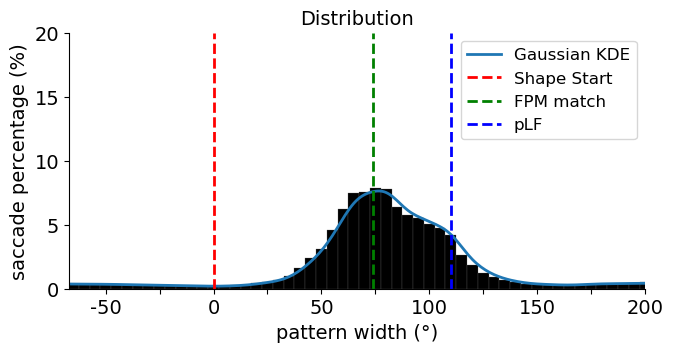

In [27]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.2)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=theoretical_angle+ROLL, color='green', linestyle='--', label='FPM match')
plt.axvline(x=plf_angle+ROLL, color='blue', linestyle='--', label='pLF')
plt.legend()

# Save the plot as an SVG file
plt.savefig("../writeup_exports_additional/pool/pool_2B.svg", format="svg", bbox_inches='tight')

# show
plt.show()

# Test Image 2C

In [28]:
# load test image
test_rotations = np.load('../writeup_paths/test/image_2c_rotations.npy')
test_image = test_rotations[180]
x_fpm = x_from_fpm(image=test_image, fpm=FPM)
theoretical_angle =  x_fpm - 180
theoretical_angle

28

<Axes: title={'center': 'Test Image'}, xlabel='X-axis', ylabel='Y-axis'>

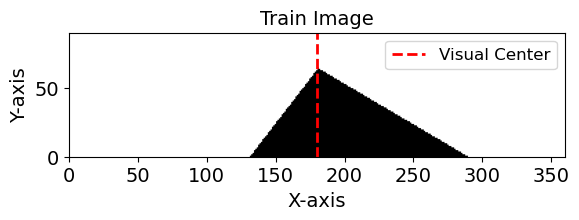

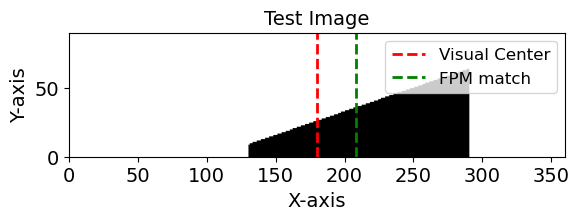

In [29]:
# Plot train and test with FPM match
plot_image(train_image, title='Train Image')
plot_image(test_image, fpm=x_fpm, title='Test Image')

In [30]:
# initialize results dictionnaries
left_dict = {}
right_dict = {}
sum_dict = {}
diff_dict = {}

In [31]:
# loop over colonies ()params
for name, colony in colony_dict.items():
    # print colony name
    print (name)

    # get test rotations
    test_rotations_transformed = [overlap_downsample_transform(arr, overlap=name[1]) for arr in test_rotations]
    rotation_tensor = [torch.tensor(a, dtype=torch.float) for a in test_rotations_transformed]
    rotation_tensor = torch.stack(rotation_tensor)

    # initialise arrays
    left_arr = np.zeros((colony_size, 360))
    right_arr = np.zeros((colony_size, 360))
    sum_arr = np.zeros((colony_size, 360))
    diff_arr = np.zeros((colony_size, 360))

    # run all models and get matrices
    for i in range(colony_size):
        model = colony_dict[name][i]
        l, r, s, d = model.forward(rotation_tensor)
        left_arr[i,:] = l.detach().numpy().flatten()
        right_arr[i,:] = r.detach().numpy().flatten()
        sum_arr[i,:] = s.detach().numpy().flatten()
        diff_arr[i,:] = d.detach().numpy().flatten()

    # set the dictionnary to the appropriate matrix
    left_dict[name] = left_arr
    right_dict[name] = right_arr
    sum_dict[name] = sum_arr
    diff_dict[name] = diff_arr

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)


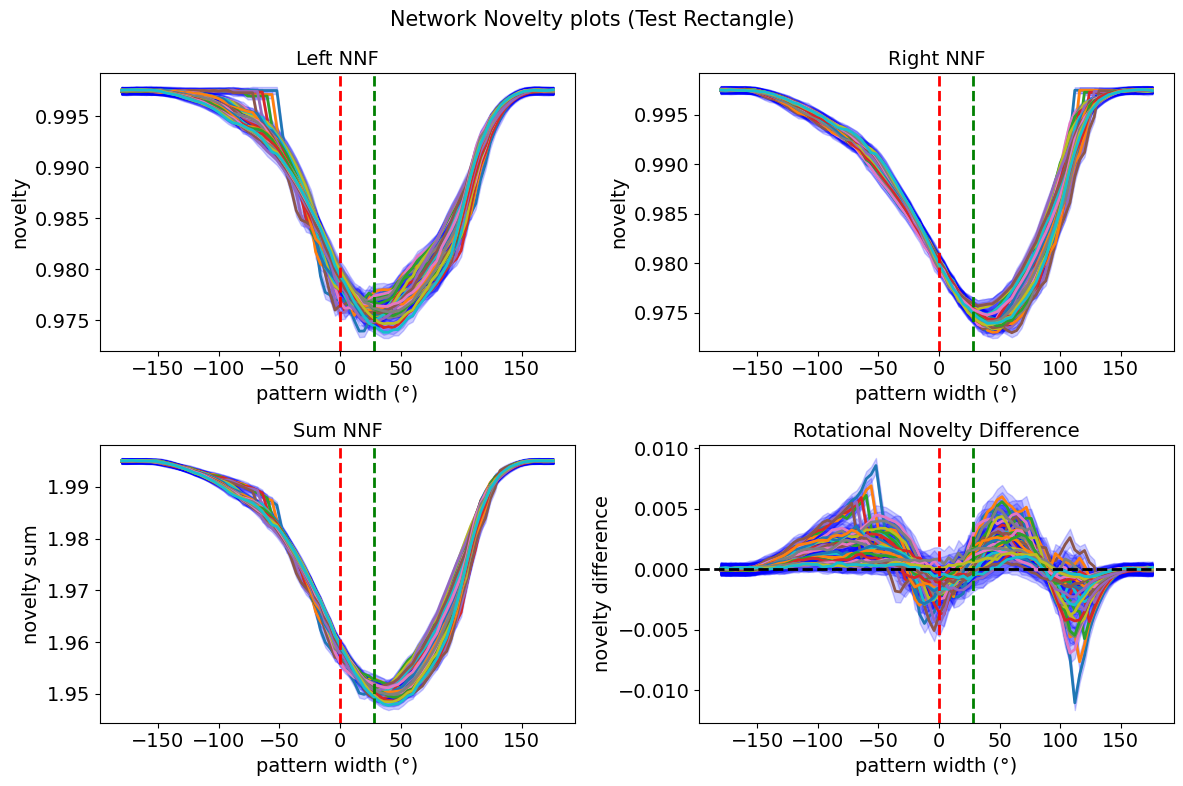

In [32]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Title
plt.suptitle('Network Novelty plots (Test Rectangle)')

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    # angles
    angles = range(-180, 180, 1)

    # Plot the mean curves
    for name in colony_dict:
        mean_curve = np.mean(signals[i][name], axis=0)
        std_curve = np.std(signals[i][name], axis=0)
        # Plot the mean curve
        ax.plot(angles[::4], (mean_curve)[::4], label=name)
        # Plot the standard deviation as a shaded region
        ax.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
    # labelling
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('pattern width (°)')
    ax.set_title(titles[i])
    ax.axvline(x=theoretical_angle, color='green', linestyle='--', label='FPM match')
    ax.axvline(x=0, color='red', linestyle='--', label='Visual Center')
    if i == 3:
        ax.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
        # no legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

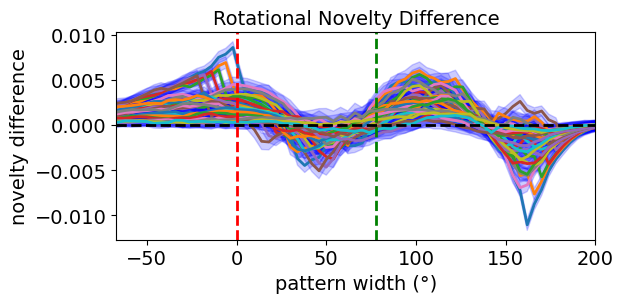

In [33]:
# Signal dictionnaries
signals = [left_dict, right_dict, sum_dict, diff_dict]

# Text information
titles = ['Left NNF', 'Right NNF', 'Sum NNF', 'Rotational Novelty Difference']
ylabels = ['novelty', 'novelty', 'novelty sum', 'novelty difference']

# Create a figure and four subplots
fig= plt.figure(figsize=(6.4, 6.4/2))

# Roll value
ROLL = 50
i = 3

# angles
angles = np.array(range(-180, 180, 1))+ROLL

# Plot the mean curves
for name in colony_dict:
    mean_curve = np.mean(signals[i][name], axis=0)
    std_curve = np.std(signals[i][name], axis=0)
    # Plot the mean curve
    plt.plot(angles[::4], (mean_curve)[::4], label=name)
    # Plot the standard deviation as a shaded region
    plt.fill_between(angles[::4], (mean_curve - std_curve)[::4], (mean_curve + std_curve)[::4], color='blue',alpha=0.2)
    
# Labelling
plt.ylabel(ylabels[i])
plt.xlabel('pattern width (°)')
plt.title(titles[i])
plt.axvline(x=theoretical_angle+ROLL, color='green', linestyle='--', label='FPM match')
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.xlim(-67, 200)  # Restrict x-axis to -90 to 90
plt.axhline(y=0, color='black', linestyle='--', label='Equal Novelty')
# plt.legend(loc='upper right')  # Add legend to each subplot
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
# initialize pooling
roll = ROLL
n_saccades = 100
TEST_NUM = 5
TEST_NAME = "MODE_2C"
dist_pooled = []

# parameters
for name in colony_dict:
    print (name) # loop over colony
    dist_name = []
    for i in range(colony_size):
        # parameters
        novelty_diff = diff_dict[name][i]
        novelty_sum = sum_dict[name][i]
        
        # get weighed distribution
        dist_sum = get_weighed_distribution(novelty_diff, novelty_sum, n_saccades, roll)
        dist_name += list(dist_sum)
        dist_pooled += list(dist_sum)

    # performance
    predicted_modes = kde_predictions(dist_name)
    true_mode = mode_location_dict[TEST_NAME]
    perf = get_performance(predicted_modes, true_mode)
    performance_tensor[TEST_NUM, crossover_index[name[0]], overlap_index[name[1]]] = perf
    #print (perf)

# pool performance
predicted_modes = kde_predictions(dist_pooled)
print(predicted_modes)
true_mode = mode_location_dict[TEST_NAME]
print(true_mode)
perf = get_performance(predicted_modes, true_mode)
performance_vector[TEST_NUM] = perf
print (perf)

('DS_q=1', 0)
('DS_q=1', 8)
('DS_q=1', 16)
('DS_q=1', 24)
('DS_q=1', 32)
('DS_q=1', 40)
('DS_q=0.9', 0)
('DS_q=0.9', 8)
('DS_q=0.9', 16)
('DS_q=0.9', 24)
('DS_q=0.9', 32)
('DS_q=0.9', 40)
('DS_q=0.8', 0)
('DS_q=0.8', 8)
('DS_q=0.8', 16)
('DS_q=0.8', 24)
('DS_q=0.8', 32)
('DS_q=0.8', 40)
('DS_q=0.7', 0)
('DS_q=0.7', 8)
('DS_q=0.7', 16)
('DS_q=0.7', 24)
('DS_q=0.7', 32)
('DS_q=0.7', 40)
('DS_q=0.6', 0)
('DS_q=0.6', 8)
('DS_q=0.6', 16)
('DS_q=0.6', 24)
('DS_q=0.6', 32)
('DS_q=0.6', 40)
[-48  75 134]
74.3
0.7000000000000028


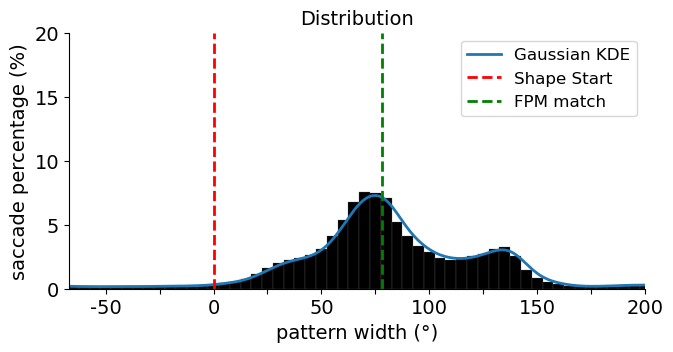

In [35]:
# Plotting
plot_distribution_image(dist_pooled, y_lim=0.2)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.axvline(x=theoretical_angle+roll, color='green', linestyle='--', label='FPM match')
plt.legend()

# Save the plot as an SVG file
plt.savefig("../writeup_exports_additional/pool/pool_2C.svg", format="svg", bbox_inches='tight')

# show
plt.show()